In [1]:

import yaml
from inspect import getsourcefile
import os.path
import os
os.system('module load gurobipy3')

import sys
import matplotlib

import matplotlib.pyplot as plt
import argparse
# import gurobipy
current_path = os.path.abspath(getsourcefile(lambda:0))
current_dir = os.path.dirname(current_path)
parent_dir = os.path.dirname(current_dir)
parent_parent_dir = os.path.dirname(parent_dir)
sys.path.insert(0, parent_parent_dir+"/heuristics")

print(parent_parent_dir+"/heuristics")

# parent_dir = current_dir[:current_dir.rfind(os.path.sep)]
sys.path.insert(0, parent_parent_dir)


from group import SEIR_group, DynamicalModel
import math
import pprint
import pandas as pd
import pickle
import numpy as np
from copy import deepcopy



/usr/local/ifs/projects/daniancu-covid-targets/covid-optimization/heuristics


0', 'testing-homogeneous', 'natests-0', 'nmtests-0', 'T-90', 'startday-60', 'groups-all', 'dschool-0.500000', 'eta-0.200000', 'freq-90-14.yaml']
dynamic_gradient
['xi-1859951', 'icus-3200', 'testing-homogeneous', 'natests-0', 'nmtests-0', 'T-90', 'startday-60', 'groups-all', 'dschool-0.500000', 'eta-0.200000', 'freq-90-14.yaml']
dynamic_gradient
['xi-929975', 'icus-3200', 'testing-homogeneous', 'natests-0', 'nmtests-0', 'T-90', 'startday-60', 'groups-all', 'dschool-0.500000', 'eta-0.200000', 'freq-90-14.yaml']
[44241662095.392044, 42948222501.496445, 52695553965.593704, 49113838918.99827, 45378052798.75709, 48588411221.3922]
[6437.143629221085, 6170.115035651589, 15699.763685185984, 10322.784505197444, 7449.670940544188, 8400.339319046481]
linearization_heuristic_optBouncing=False_initial_uhat=full_lockdown
['xi-1859951.5', 'icus-2000.0', 'testing-linearization', 'heuristic', 'natests-0.0', 'nmtests-0.0', 'T-90', 'startday-60', 'groups-all', 'dschool-0.5', 'eta-0.2', 'lockdownFreq-14',

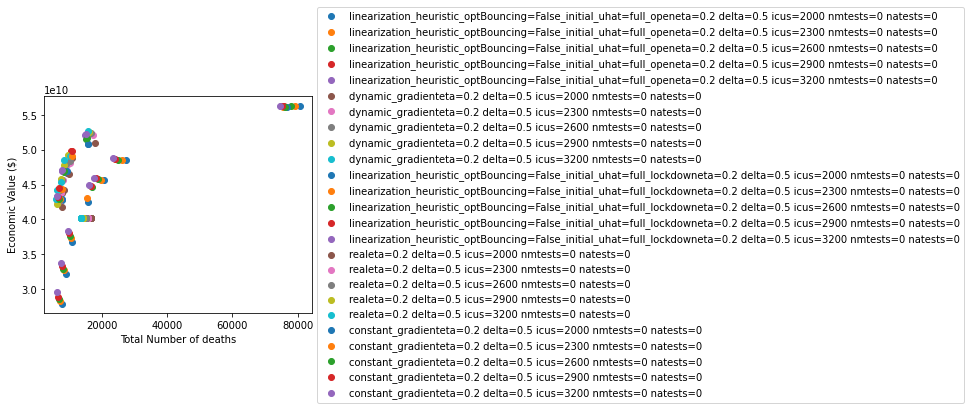

In [16]:
etas = [0.2]
deltas = [0.5]
icus = [2000,2300,2600,2900,3200]
lockdown_freq=14
testing_freq=7
nmtests = [0]
natests = [0]

heurs = ["linearization_heuristic_optBouncing=False_initial_uhat=full_open","dynamic_gradient","linearization_heuristic_optBouncing=False_initial_uhat=full_lockdown","real","constant_gradient"]
# ["dynamic_gradient"]
# , "linearization_heuristic_optBouncing=False_initial_uhat=full_lockdown"]

# xi-0.0_icus-2000.0_testing-linearization_heuristic_natests-0.0_nmtests-0.0_T-90_startday-60_groups-all_dschool-0.5_eta-0_lockdownFreq-14_testingFreq-7

fig, ax = plt.subplots()

for h in heurs:
    for e in etas:
        for d in deltas:
            for i in icus:
                for nm in nmtests:
                    for na in natests:
                        all_deaths = []
                        all_econ_values = []
                        
                        for file_name in os.listdir(h):
                            instance = file_name.split("_")

                            for p in instance:
                                if "xi" in p:
                                    xi = float(p.split("-")[1])
                    #                 print(xi)
                                if "icus" in p:
                                    icu = float(p.split("-")[1])
                    #                 print(icu)
                                if "natests" in p:
                                    natest = float(p.split("-")[1])
                    #                 print(natest)
                                if "nmtests" in p:
                                    nmtest = float(p.split("-")[1])
                    #                 print(nmtest)
                                if "dschool" in p:
                                    delta = float(p.split("-")[1])
                    #                 print(delta)
                                if "eta" in p:
                                    eta = float(p.split("-")[1])
                    #                 print(eta)
                            if eta == e and icu == i and nmtest == nm and natest == na and delta == d:
                                print(h)
                                print(instance)
                                
                                with open("%s/%s"%(h,file_name)) as file:
                                    result = yaml.load(file, Loader=yaml.UnsafeLoader)


                                # Read group parameters
                                with open("../../parameters/fitted.yaml") as file:
                                    universe_params_all = yaml.load(file, Loader=yaml.FullLoader)

                                # Read econ parameters
                                with open("../../parameters/econ.yaml") as file:
                                    econ_params_all = yaml.load(file, Loader=yaml.FullLoader)

                                # Read group parameters
                                with open("../../parameters/one_group_fitted.yaml") as file:
                                    universe_params_one = yaml.load(file, Loader=yaml.FullLoader)

                                # Read econ parameters
                                with open("../../parameters/one_group_econ.yaml") as file:
                                    econ_params_one = yaml.load(file, Loader=yaml.FullLoader)


                                start_day = result["experiment_params"]["start_day"]

                                if result["groups"] == "one":
                                    universe_params = universe_params_one
                                    econ_params = econ_params_one

                                    with open("../../initialization/%ddays_one_group.yaml"%start_day) as file:
                                        initialization = yaml.load(file, Loader=yaml.FullLoader)

                                elif result["groups"] == "all":
                                    universe_params = universe_params_all
                                    econ_params = econ_params_all

                                    with open("../../initialization/%ddays.yaml"%start_day) as file:
                                        initialization = yaml.load(file, Loader=yaml.FullLoader)
                                else:
                                    assert(False)

                                experiment_params = result["experiment_params"]

                                dynModel = DynamicalModel(universe_params, econ_params, experiment_params, initialization, 1, experiment_params["T"], universe_params["mixing"], start_day, result["experiment_params"]['eta'], extra_data = True)

                                for t in range(experiment_params["T"]):
                                    dynModel.take_time_step(result["m_tests"][t], result["a_tests"][t], result["policy"][t])

                                dynModel.take_end_steps()

                                deaths = dynModel.get_total_deaths()
                                econ_value = dynModel.get_total_economic_value()
                                
                                all_deaths.append(deaths)
                                all_econ_values.append(econ_value)

                        ax.scatter(all_deaths, all_econ_values, label=h+f"eta={e} delta={d} icus={i} nmtests={nm} natests={na}")
                        print(all_econ_values)
                        print(all_deaths)
ax.set_ylabel('Economic Value ($)')
ax.set_xlabel('Total Number of deaths')
box = ax.get_position()
ax.set_position([box.x0, box.y0, box.width * 0.8, box.height])

# Put a legend to the right of the current axis
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()
            
# for eta in etas:
#     for delta in deltas:
#         for icu in icus:
#             for nmtest in nmtests:
#                 for natest in natests:
#                     for heur in heurs:
                        
                    



